# Bellabeat Wellness Analysis

## **1) Ask**

### 1.1) Understanding Key Stakeholders

1. **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
2. **Sando Mur**: Mathematician and Bellabeat’s other cofounder
3. **Marketing & Analytics Team at Bellabeat**: The team of data analysts responsible for data collection, analysis, and reporting to help guide Bellabeat's marketing strategy
4. **Bellabeat Customers**: Any consumer that uses Bellabeat's products

### 1.2) Define the Business Task

Understand how consumers are using their smart devices to guide a marketing strategy for  Bellabeat.

## **2) Prepare**

### 2.1) Understanding the Data Source & Credibility

These data are taken originally from [here](https://zenodo.org/record/53894#.YMoUpnVKiP9) then subsequently posted on Kaggle [here](https://www.kaggle.com/datasets/arashnic/fitbit?datasetId=1041311). They were collected through a survey via *Amazon Mechanical Turk* between 12-03-2016 and 12-05-2016. These data consist of thirty "eligible" Fitbit users including daily, hourly, and by minute calories burned, intensities of exercise, and steps. They also include sleep, weight, and heartrate data. The collectors of these data did not elaborate on how they considered users "eligible" but did acknowledge that variation in the outputs could be a result of different Fitbit models and participant behavior and preferences. These data seem credible even though they are crowd-sourced and from a third party. Said data is also current, as it was updated in 2021.

### 2.2) Choosing Which Datasets to Use

I decided to use ```dailyActivity_merged```, as it is a collective file of ```dailyCalories_merged```, ```dailyIntensities_merged```, and ```dailySteps_merged```. The hourly calorie, intensitiy, and step datasets were used, along with the weight log, daily sleep, and heart rate log datasets. Minute datasets seemed unnecessary, and the three daily datasets stated above have redundant information.

## **3) Process**

### 3.1) Data Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
from scipy.stats import shapiro, fligner, kruskal

In [2]:
PATH = './data/'

daily_activity_df = pd.read_csv(PATH + 'dailyActivity_merged.csv')

hourly_calorie_df = pd.read_csv(PATH + 'hourlyCalories_merged.csv')
hourly_intensity_df = pd.read_csv(PATH + 'hourlyIntensities_merged.csv')
hourly_step_df = pd.read_csv(PATH + 'hourlySteps_merged.csv')

heartrate_df = pd.read_csv(PATH + 'heartrate_seconds_merged.csv')
sleep_day_df = pd.read_csv(PATH + 'sleepDay_merged.csv')
weight_log_df = pd.read_csv(PATH + 'weightLogInfo_merged.csv')

### 3.2) Data Exploration

Let's understand a little bit about the data.

In [3]:
print(daily_activity_df.describe())
print(daily_activity_df.dtypes)

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

There are a couple of concerning metrics shown in this summary. The min of ```TotalSteps``` is zero. This is odd, since the average person does not walk zero steps in a day. Another concerning metric is that the max of the ```TotalSteps``` is 36,000 steps in one day. The CDC typically [recommends a goal of 10,000 steps per day](https://www.cdc.gov/diabetes/prevention/pdf/postcurriculum_session8.pdf). More than three times that seems like an error, so I will explore this as well.

In [4]:
print(hourly_calorie_df.describe())
print(hourly_calorie_df.dtypes)

                 Id      Calories
count  2.209900e+04  22099.000000
mean   4.848235e+09     97.386760
std    2.422500e+09     60.702622
min    1.503960e+09     42.000000
25%    2.320127e+09     63.000000
50%    4.445115e+09     83.000000
75%    6.962181e+09    108.000000
max    8.877689e+09    948.000000
Id               int64
ActivityHour    object
Calories         int64
dtype: object


In [5]:
print(hourly_intensity_df.describe())
print(hourly_intensity_df.dtypes)

                 Id  TotalIntensity  AverageIntensity
count  2.209900e+04    22099.000000      22099.000000
mean   4.848235e+09       12.035341          0.200589
std    2.422500e+09       21.133110          0.352219
min    1.503960e+09        0.000000          0.000000
25%    2.320127e+09        0.000000          0.000000
50%    4.445115e+09        3.000000          0.050000
75%    6.962181e+09       16.000000          0.266667
max    8.877689e+09      180.000000          3.000000
Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object


In [6]:
print(hourly_step_df.describe())
print(hourly_step_df.dtypes)

                 Id     StepTotal
count  2.209900e+04  22099.000000
mean   4.848235e+09    320.166342
std    2.422500e+09    690.384228
min    1.503960e+09      0.000000
25%    2.320127e+09      0.000000
50%    4.445115e+09     40.000000
75%    6.962181e+09    357.000000
max    8.877689e+09  10554.000000
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


In [7]:
print(heartrate_df.describe())
print(heartrate_df.dtypes)

                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.732842e+01
std    1.950224e+09  1.940450e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  2.030000e+02
Id        int64
Time     object
Value     int64
dtype: object


In [8]:
print(sleep_day_df.describe())
print(sleep_day_df.dtypes)

                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.130000e+02         413.000000          413.000000      413.000000
mean   5.000979e+09           1.118644          419.467312      458.639225
std    2.060360e+09           0.345521          118.344679      127.101607
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.000000
50%    4.702922e+09           1.000000          433.000000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


In [9]:
print(weight_log_df.describe())
print(weight_log_df.dtypes)

                 Id    WeightKg  WeightPounds       Fat        BMI  \
count  6.700000e+01   67.000000     67.000000   2.00000  67.000000   
mean   7.009282e+09   72.035821    158.811801  23.50000  25.185224   
std    1.950322e+09   13.923206     30.695415   2.12132   3.066963   
min    1.503960e+09   52.599998    115.963147  22.00000  21.450001   
25%    6.962181e+09   61.400002    135.363832  22.75000  23.959999   
50%    6.962181e+09   62.500000    137.788914  23.50000  24.389999   
75%    8.877689e+09   85.049999    187.503152  24.25000  25.559999   
max    8.877689e+09  133.500000    294.317120  25.00000  47.540001   

              LogId  
count  6.700000e+01  
mean   1.461772e+12  
std    7.829948e+08  
min    1.460444e+12  
25%    1.461079e+12  
50%    1.461802e+12  
75%    1.462375e+12  
max    1.463098e+12  
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport 

In [10]:
# Checking if any of the datasets have null values
print(daily_activity_df.isnull().values.any())
print(hourly_calorie_df.isnull().values.any())
print(hourly_intensity_df.isnull().values.any())
print(hourly_step_df.isnull().values.any())
print(heartrate_df.isnull().values.any())
print(sleep_day_df.isnull().values.any())
print(weight_log_df.isnull().values.any())

False
False
False
False
False
False
True


In [11]:
# Looks like the weight log has some missing values. Let's take a look.
weight_log_df[weight_log_df.isna().any(axis=1)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


Looks like all of the NaN values in the weight log dataframe come from the Fat column. It does not look like this has a discernible pattern as to when a NaN occurs. Some examples of these patterns could be if the report was manual or not, or if the person ID is the same.

In [12]:
# Let's now explore the zero data within the daily activity df
daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
104,1844505072,4/24/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
105,1844505072,4/25/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
106,1844505072,4/26/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
112,1844505072,5/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,5/6/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
905,8792009665,5/7/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
906,8792009665,5/8/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
907,8792009665,5/9/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688


This is quite interesting. There are 77 instances of (pretty much) null values. Out of 940 total data points, this represents about 8% of the total activity data. It seems impossible for a person to not record any steps during their day. These values could likely come from the person not wearing the fitbit during that day, or it could be some strange reporting error. In either case, these data points can be ignored, as they are not relevant to the analysis. Since the activity data are agregated, the hourly data should also reflect this.

In [13]:
# Exploring the high max step statistic
daily_activity_df.loc[daily_activity_df['TotalSteps'] > 25000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,1624580081,5/1/2016,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690
913,8877689391,4/16/2016,29326,25.290001,25.290001,0.0,13.24,1.21,10.71,0.00,94,29,429,888,4547
927,8877689391,4/30/2016,27745,26.719999,26.719999,0.0,21.66,0.08,4.93,0.00,124,4,223,1089,4398


In [14]:
# Looking at all records from the outlier's Id
daily_activity_df.loc[daily_activity_df['Id'] == 1624580081]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
31,1624580081,4/12/2016,8163,5.310000,5.310000,0.0,0.00,0.00,5.31,0.00,0,0,146,1294,1432
32,1624580081,4/13/2016,7007,4.550000,4.550000,0.0,0.00,0.00,4.55,0.00,0,0,148,1292,1411
33,1624580081,4/14/2016,9107,5.920000,5.920000,0.0,0.00,0.00,5.91,0.01,0,0,236,1204,1572
34,1624580081,4/15/2016,1510,0.980000,0.980000,0.0,0.00,0.00,0.97,0.00,0,0,96,1344,1344
35,1624580081,4/16/2016,5370,3.490000,3.490000,0.0,0.00,0.00,3.49,0.00,0,0,176,1264,1463
36,1624580081,4/17/2016,6175,4.060000,4.060000,0.0,1.03,1.52,1.49,0.01,15,22,127,1276,1554
37,1624580081,4/18/2016,10536,7.410000,7.410000,0.0,2.15,0.62,4.62,0.01,17,7,202,1214,1604
38,1624580081,4/19/2016,2916,1.900000,1.900000,0.0,0.00,0.00,1.90,0.00,0,0,141,1299,1435
39,1624580081,4/20/2016,4974,3.230000,3.230000,0.0,0.00,0.00,3.23,0.00,0,0,151,1289,1446
40,1624580081,4/21/2016,6349,4.130000,4.130000,0.0,0.00,0.00,4.11,0.02,0,0,186,1254,1467


It looks like that this value is reasonable and simply an outlier for this individual, as the active distances as well as the active minutes seem to be greater than the active distances and minutes in the 25,000 to 30,000 step range. It does seem strange, however, that the calories burned for 36,000 steps is around half of the calories burned for 29,000 steps (2690 calories and 4547 calories respectively).

### 3.3) Data Cleaning

There are a couple of things I need to do to clean these data:

* Merge hourly dataframe
* Convert ```object``` types of dates to ```datetime```
* Convert ```dd/mm/YYYY II:MM:SS pp``` dates to ```YYYY-mm-dd HH:MM:SS```
* Remove null values
* Add extra columns to all dataframes for future analysis
* Drop columns that are not needed in the analysis

In [15]:
# Merging hourly dataframes
hourly_df = hourly_calorie_df.merge(hourly_intensity_df, how = 'left').merge(hourly_step_df, how = 'left')
print(hourly_df.shape)
hourly_df.head()

(22099, 6)


,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [16]:
# Converting object to datetype and to YYYY-mm-dd format
daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'], format="%m/%d/%Y")
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'], format="%m/%d/%Y %I:%M:%S %p")
sleep_day_df['SleepDay'] = pd.to_datetime(sleep_day_df['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")
weight_log_df['Date'] = pd.to_datetime(weight_log_df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [17]:
# Sanity check
print(daily_activity_df['ActivityDate'].dtypes)
print(hourly_df['ActivityHour'].dtypes)
print(heartrate_df['Time'].dtypes)
print(sleep_day_df['SleepDay'].dtypes)
print(weight_log_df['Date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [18]:
# Adding date without time as a column for boolean indexing in removing the null values
hourly_df['Date'] = hourly_df['ActivityHour'].dt.strftime('%Y-%m-%d')

# Sanity check
hourly_df['Date'].head()

0    2016-04-12
1    2016-04-12
2    2016-04-12
3    2016-04-12
4    2016-04-12
Name: Date, dtype: object

In [19]:
# Creating null value dataframe for boolean indexing use
null_activity_df = daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0] 

# Removing null values from daily activity
daily_activity_df = daily_activity_df.loc[daily_activity_df['TotalSteps'] != 0]

# Also need to remove the same values from the hourly dataframe
null_removal_check = pd.Series(hourly_df.Id.isin(null_activity_df.Id) & hourly_df.Date.isin(null_activity_df.ActivityDate))
null_removal_check[null_removal_check].index

Index([], dtype='int64')

In [20]:
# Sanity check for daily activity dataframe
daily_activity_df.loc[daily_activity_df['TotalSteps'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


It seems that there are no matching values in the null activity dataframe and the hourly activity dataframe. I decided to try matching up the Id of the participant with the date that the activity was at 0. This was done to keep the analyses consistent.

In [21]:
daily_activity_df['ActiveMinutes'] = daily_activity_df['VeryActiveMinutes'] + daily_activity_df['FairlyActiveMinutes'] + daily_activity_df['LightlyActiveMinutes']
daily_activity_df['Day'] = daily_activity_df['ActivityDate'].dt.strftime('%A')

daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,Saturday


In [22]:
hourly_df['Hour'] = hourly_df['ActivityHour'].dt.strftime('%H')
hourly_df = hourly_df.rename(columns={'ActivityHour': 'ActivityDate'})

hourly_df['ActivityDate'] = hourly_df['ActivityDate'].dt.strftime('%Y-%m-%d')

hourly_df.head()

,Id,ActivityDate,Calories,TotalIntensity,AverageIntensity,StepTotal,Date,Hour
0,1503960366,2016-04-12,81,20,0.333333,373,2016-04-12,00
1,1503960366,2016-04-12,61,8,0.133333,160,2016-04-12,01
2,1503960366,2016-04-12,59,7,0.116667,151,2016-04-12,02
3,1503960366,2016-04-12,47,0,0.000000,0,2016-04-12,03
4,1503960366,2016-04-12,48,0,0.000000,0,2016-04-12,04


In [23]:
heartrate_df = heartrate_df.rename(columns={'Time': 'Date'})
heartrate_df['Hour'] = heartrate_df['Date'].dt.strftime('%H')

heartrate_df['Date'] = heartrate_df['Date'].dt.strftime('%Y-%m-%d')

heartrate_df.head()

,Id,Date,Value,Hour
0,2022484408,2016-04-12,97,07
1,2022484408,2016-04-12,102,07
2,2022484408,2016-04-12,105,07
3,2022484408,2016-04-12,103,07
4,2022484408,2016-04-12,101,07


In [24]:
sleep_day_df['Day'] = sleep_day_df['SleepDay'].dt.strftime('%A')
sleep_day_df['SleepDay'] = sleep_day_df['SleepDay'].dt.strftime('%Y-%m-%d')

sleep_day_df = sleep_day_df.rename(columns={'SleepDay': 'Date'})

sleep_day_df.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [25]:
# Dropping unnecessary columns
daily_activity_df = daily_activity_df.drop(['TrackerDistance', 'VeryActiveDistance', 
                                            'ModeratelyActiveDistance', 'LightActiveDistance', 
                                            'SedentaryActiveDistance'], axis=1)
print(daily_activity_df.columns)

hourly_df = hourly_df.drop(['Date'], axis=1)
print(hourly_df.columns)

sleep_day_df = sleep_day_df.drop(['TotalSleepRecords'], axis=1)
print(sleep_day_df.columns)

weight_log_df = weight_log_df.drop(['Fat', 'LogId'], axis=1)
print(weight_log_df.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'LoggedActivitiesDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'ActiveMinutes',
       'Day'],
      dtype='object')
Index(['Id', 'ActivityDate', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal', 'Hour'],
      dtype='object')
Index(['Id', 'Date', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Day'], dtype='object')
Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport'], dtype='object')


Here is a comprehensive list and reason for dropping the columns in the above cell:

* ```TrackerDistance``` was dropped from the activity dataframe due to it being redundant values. The ```TotalDistance``` column is exactly the same. The rest of the ```ActiveDistance``` columns were also dropped due to them being unnecessary for analysis.
* ```Date``` from the hourly dataframe was dropped due to it only being used for boolean indexing.
* ```TotalSleepRecords``` from the sleep dataframe did not seem useful as data, so the column was dropped.
* ```Fat``` and ```LogId``` was dropped from the weight dataframe due to ```Fat``` having missing values and both being somewhat unnecessary for analysis.

## **4) Analyze**

I will now try to understand what trends are in these data. Let's try to first see how Fitbit customers are using their tracker products.

In [26]:
logged_distance_count = (daily_activity_df['LoggedActivitiesDistance'] != 0).sum()
total_count = (daily_activity_df['LoggedActivitiesDistance'] == 0).sum() + logged_distance_count
print('The number of logged activities is: ', logged_distance_count)
print('The percentage of logged activities is: ', (logged_distance_count/total_count) * 100, '%')

The number of logged activities is:  32
The percentage of logged activities is:  3.7079953650057935 %


In [27]:
daily_activity_df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
count,8.630000e+02,863,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,4.857542e+09,2016-04-26 02:16:49.501738240,8319.392816,5.979513,0.117822,23.015064,14.775203,210.016222,955.753187,2361.295481,247.806489
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000
25%,2.320127e+09,2016-04-18 00:00:00,4923.000000,3.370000,0.000000,0.000000,0.000000,146.500000,721.500000,1855.500000,182.500000
50%,4.445115e+09,2016-04-26 00:00:00,8053.000000,5.590000,0.000000,7.000000,8.000000,208.000000,1021.000000,2220.000000,258.000000
75%,6.962181e+09,2016-05-03 00:00:00,11092.500000,7.900000,0.000000,35.000000,21.000000,272.000000,1189.000000,2832.000000,323.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,4.942142,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000
std,2.418405e+09,NaN,4744.967224,3.721044,0.646111,33.646118,20.427405,96.781296,280.293359,702.711148,105.518863


In [28]:
hourly_df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


In [29]:
# Count unique users in sleep data
len(sleep_day_df.Id.unique())

24

In [30]:
sleep_day_df.describe()

,Id,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000
mean,5.000979e+09,419.467312,458.639225
std,2.060360e+09,118.344679,127.101607
min,1.503960e+09,58.000000,61.000000
25%,3.977334e+09,361.000000,403.000000
50%,4.702922e+09,433.000000,463.000000
75%,6.962181e+09,490.000000,526.000000
max,8.792010e+09,796.000000,961.000000


In [31]:
heartrate_df['Value'].describe().apply(lambda x: format(x,'f'))

count    2483658.000000
mean          77.328424
std           19.404500
min           36.000000
25%           63.000000
50%           73.000000
75%           88.000000
max          203.000000
Name: Value, dtype: object

In [32]:
total_manual_report = (weight_log_df['IsManualReport'] == True).sum()
total_report_num = (weight_log_df['IsManualReport'] == False).sum() + total_manual_report
manual_report_df = weight_log_df[['Id', 'IsManualReport']]
print(manual_report_df.groupby(['Id']).value_counts())

print('The total number of manual weight reports is', total_manual_report)
print('The percentage of manual reports out of all weight reports is', (total_manual_report/total_report_num)*100, '%')

Id          IsManualReport
1503960366  True               2
1927972279  False              1
2873212765  True               2
4319703577  True               2
4558609924  True               5
5577150313  False              1
6962181067  True              30
8877689391  False             24
Name: count, dtype: int64
The total number of manual weight reports is 41
The percentage of manual reports out of all weight reports is 61.19402985074627 %


Elementary Key Findings:

* Typically, these users do not manually log their activity. Around 4% of all activity logs showed an activity that was logged manually.
* The average steps taken daily across all logs is 8319 steps.
* Users average around 23 very active minutes, 14 fairly active minutes, 210 lightly active minutes, and 955 sedentary minutes per day.
* The average number of calories burned per day is 2361.
* On an hourly basis, users on average take 320 steps and burn 97 calories.
* Out of 30 total participants, 24 of them logged at least one instance of sleep data. This is 80% of the participants.
* The average person slept a little less than 420 minutes, which is 7 hours.
* The average heart rate across all logs was 77 bpm.
* When users report weight, they report it either fully automatically or fully manually.
* Out of the users whos data we have, the majority of users manually report their weight. 

## **5) Share**

### 5.1) Correlation Matrices

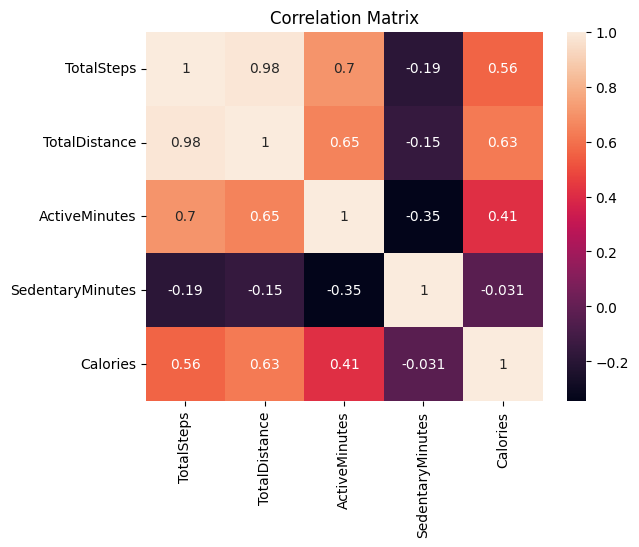

In [33]:
cols = ['TotalSteps', 'TotalDistance', 'ActiveMinutes', 
        'SedentaryMinutes', 'Calories']

corr_matrix = daily_activity_df[cols].corr()
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()

Awesome. A lot of our assumptions are shown to be true here. TotalSteps is highly correlated with TotalDistance, SedentaryMinutes is negatively correlated with TotalSteps and TotalDistance, and Calories is positively correlated with ActiveMinutes, TotalDistance, and TotalSteps while negatively correlated with SedentaryMinutes. This is great as it shows that it strengthens the reliabilty of these data.

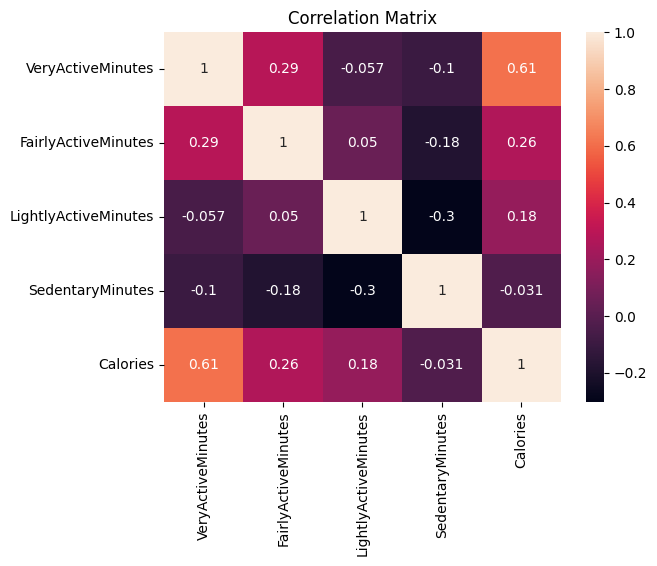

In [34]:
cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
        'SedentaryMinutes', 'Calories']

corr_matrix = daily_activity_df[cols].corr()
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()


Here, I go a bit deeper in analyzing correlations between the different types of measured minutes and burned calories. This shows that there is a strong positive correlation between VeryActiveMinutes and Calories, a positive but weak correlation between FairlyActiveMinutes and Calories, and a very weak positive correlation between LightlyActiveMinutes and Calories. There is also a weak negative correlation between SedentaryMinutes and Calories.

### 5.2) Diving Deeper into the Daily Activity of Users

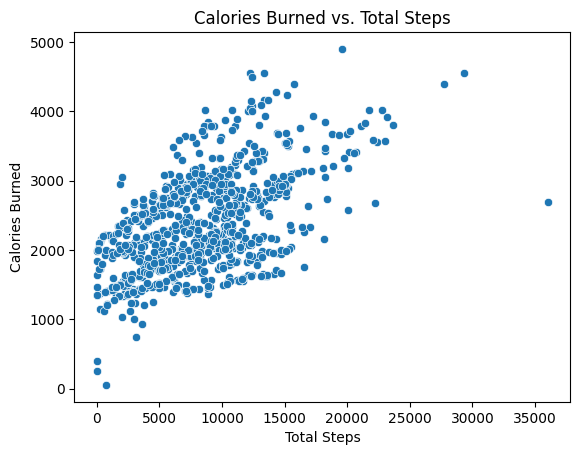

In [35]:
scatter = sns.scatterplot(x='TotalSteps', y='Calories', data=daily_activity_df)
scatter.set(xlabel='Total Steps', ylabel='Calories Burned', title='Calories Burned vs. Total Steps')
plt.show()

This is consistent with the correlation matrix. There is a medium positive relationship between total steps and number of calories burned on a given day. This also looks heavily skewed by outliers in both the lower and higher ends. These data are also extremely varied, which could be as a result of over- and under-estimation of calories burned, as well as the calorie calculation itself that takes into account the user's weight.

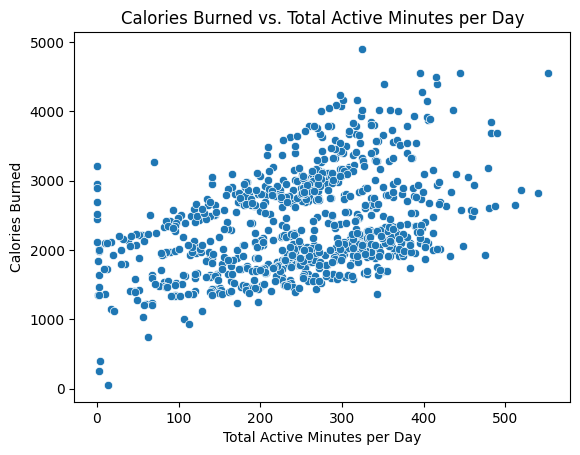

In [36]:
scatter = sns.scatterplot(x='ActiveMinutes', y='Calories', data=daily_activity_df)
scatter.set(xlabel='Total Active Minutes per Day', ylabel='Calories Burned', title='Calories Burned vs. Total Active Minutes per Day')
plt.show()

Like the above scatterplot, these data are also extremely varied. There is also a weak positive relationship between the total active minutes per day and the number of calories burned, which is consistent with the correlation matrix.

### 5.3) Statistical Significance Between Groups (Day)

My null hypothesis or $H_0$ is that there is no significant difference of ```TotalDistance``` between days.

My $H_0$ for calories is that there is no significant difference of ```Calories``` burned between days.

In [37]:
# Check the number of logs per day
daily_activity_df.groupby(['Day']).count()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
Day,,,,,,,,,,,
Friday,120,120,120,120,120,120,120,120,120,120,120
Monday,110,110,110,110,110,110,110,110,110,110,110
Saturday,113,113,113,113,113,113,113,113,113,113,113
Sunday,110,110,110,110,110,110,110,110,110,110,110
Thursday,133,133,133,133,133,133,133,133,133,133,133
Tuesday,138,138,138,138,138,138,138,138,138,138,138
Wednesday,139,139,139,139,139,139,139,139,139,139,139


For some reason, the days are not in order. Let's change that.

In [38]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
daily_activity_df['Day'] = daily_activity_df['Day'].astype(cat_type)
daily_activity_df.groupby(['Day']).count()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
Day,,,,,,,,,,,
Monday,110,110,110,110,110,110,110,110,110,110,110
Tuesday,138,138,138,138,138,138,138,138,138,138,138
Wednesday,139,139,139,139,139,139,139,139,139,139,139
Thursday,133,133,133,133,133,133,133,133,133,133,133
Friday,120,120,120,120,120,120,120,120,120,120,120
Saturday,113,113,113,113,113,113,113,113,113,113,113
Sunday,110,110,110,110,110,110,110,110,110,110,110


Very nice. Let's now check the normality of our measured variables. To do this, I used the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test), which tells the likelihood that the data was drawn from a Gaussian distribution. This is shown by the hypotheses:

$H_0$: The random sample was drawn from a normal distribution

$H_a$: The random sample was not drawn from a normal distribution

 The test statistic is as follows: 
 
 $W = \frac{(\sum_{i=1}^{n}a_ix_{(i)})^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

 Where:

 $x_{(i)}$ = the ordered sample values

 $\bar{x}$ = the sample mean

 $a_i$ = constants that are generated by $(a_1,...,a_n)=\frac{m^\intercal\\V^{-1}}{C}$

 Where:

 $C$ is a vector norm given by:

 $C = ||V^{-1}m||$

 and the vector $m$

 $m = (m_1,...,m_n)^{\intercal\\}$

 that is made of expected values of the order statistics of i.i.d random variables sampled from a standard normal distribution.

$V$ = the covariance matrix of those normal order statistics.

(Taken from [here](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test))

In [39]:
# Shapiro-Wilk Test
stat_step, p_step = shapiro(daily_activity_df['TotalSteps'])
stat_cal, p_cal = shapiro(daily_activity_df['Calories'])
print('Statistics (steps)=%.3f, p (steps)=%.3f' % (stat_step, p_step))
print('Statistics (calories)=%.3f, p (calories)=%.3f' % (stat_cal, p_cal))

alpha = 0.05
if p_step > alpha:
    print('Steps sample looks Gaussian')
else:
    print('Steps sample does not look Gaussian')

if p_cal > alpha:
    print('Calorie sample looks Gaussian')
else:
    print('Calorie sample does not look Gaussian')

Statistics (steps)=0.964, p (steps)=0.000
Statistics (calories)=0.972, p (calories)=0.000
Steps sample does not look Gaussian
Calorie sample does not look Gaussian


Interesting. Since these data are not normal, we must use a non-parametric statistical test. Let's assess the homogeneity of variance. This can be done through the Fligner-Killeen Test. This test statistic is shown using the formula:

$FK = \frac{\sum_{j=1}^{k}n_j(\bar{a}_j-\bar{a})^2}{s^2}$

Where:

$k$ = number of groups 

$n_j$ = the size of the $j$ th group

$\bar{a_j}$ = the mean of all of the normalization values for the $j$ th group

$\bar{a}$ = the mean of all the normalization values

and $s^2$ = the variance of all the normalization values

In [40]:
mon_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Monday']
tue_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Tuesday']
wed_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Wednesday']
thurs_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Thursday']
fri_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Friday']
sat_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Saturday']
sun_day = daily_activity_df.loc[daily_activity_df['Day'] == 'Sunday']

In [41]:
stat_step, p_step = fligner(mon_day['TotalSteps'], tue_day['TotalSteps'], wed_day['TotalSteps'], 
                            thurs_day['TotalSteps'], fri_day['TotalSteps'], sat_day['TotalSteps'],
                            sun_day['TotalSteps'])
stat_cal, p_cal = fligner(mon_day['Calories'], tue_day['Calories'], wed_day['Calories'], 
                            thurs_day['Calories'], fri_day['Calories'], sat_day['Calories'],
                            sun_day['Calories'])

print('Statistics (steps)=%.3f, p (steps)=%.3f' % (stat_step, p_step))
print('Statistics (calories)=%.3f, p (calories)=%.3f' % (stat_cal, p_cal))

alpha = 0.05
if p_step > alpha:
    print('Step variance are homogeneous')
else:
    print('Steps variance are not homogeneous')

if p_cal > alpha:
    print('Calorie variance are homogeneous')
else:
    print('Calorie variance are not homogeneous')

Statistics (steps)=4.827, p (steps)=0.566
Statistics (calories)=4.030, p (calories)=0.673
Step variance are homogeneous
Calorie variance are homogeneous


It looks like these data are homoscedastic. Therefore, we can use the Kruskal-Wallis H-test. This is assuming we have independent samples.

This is given by the equation:

$H = \frac{12}{N(N+1)}\sum_{i=1}^{k}\frac{R_i^2}{n_i}-3(N+1)$

Where:

$N$ = total sample size

$k$ = number of groups comopared

$R_i$ = the sum of ranks for group $i$

$n_i$ = the sample size of group $i$

In [42]:
stat_step, p_step = kruskal(mon_day['TotalSteps'], tue_day['TotalSteps'], wed_day['TotalSteps'], 
                            thurs_day['TotalSteps'], fri_day['TotalSteps'], sat_day['TotalSteps'],
                            sun_day['TotalSteps'])
stat_cal, p_cal = kruskal(mon_day['Calories'], tue_day['Calories'], wed_day['Calories'], 
                            thurs_day['Calories'], fri_day['Calories'], sat_day['Calories'],
                            sun_day['Calories'])

print('Statistics (steps)=%.3f, p (steps)=%.3f' % (stat_step, p_step))
print('Statistics (calories)=%.3f, p (calories)=%.3f' % (stat_cal, p_cal))

alpha = 0.05
if p_step < alpha:
    print('Reject null hypothesis')
else:
    print('Retain null hypothesis')

if p_cal < alpha:
    print('Reject null hypothesis')
else:
    print('Retain null hypothesis')

Statistics (steps)=11.461, p (steps)=0.075
Statistics (calories)=6.864, p (calories)=0.334
Retain null hypothesis
Retain null hypothesis


Since $p > 0.05$, there is no statistical significance between groups for either ```TotalSteps``` or ```Calories```

### 5.4) Diving Deeper into the Hourly Activity of Users

Let's take a look at the distribution of ```StepTotal``` and ```TotalIntensity```

<Axes: xlabel='StepTotal', ylabel='Count'>

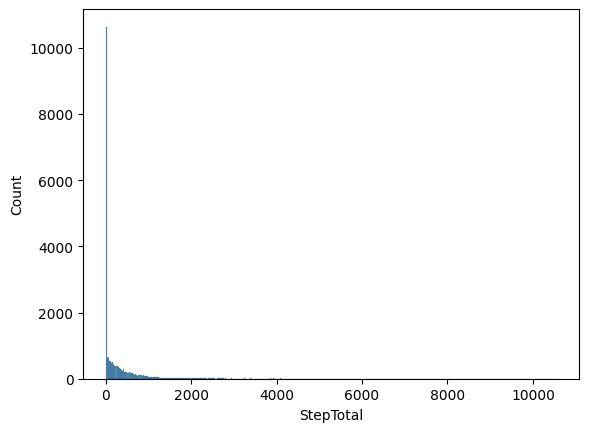

In [43]:
sns.histplot(data=hourly_df, x='StepTotal')

<Axes: xlabel='TotalIntensity', ylabel='Count'>

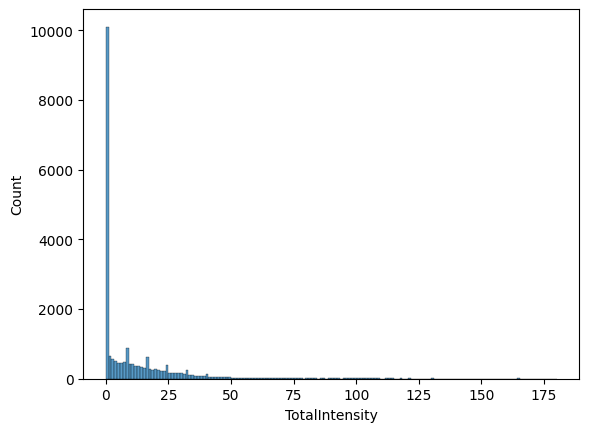

In [44]:
sns.histplot(data=hourly_df, x='TotalIntensity')

There are too many zeros to run any meaningful statistical tests. Instead, we will use measures of central tendency.

In [45]:
# Aggregate the hourly dataset and find means and medians for TotalIntensity and StepTotal
agg_hourly_df = hourly_df[['Hour', 'TotalIntensity', 'StepTotal']].groupby(['Hour']).agg(intensity_mean = ('TotalIntensity', 'mean'),
                                                                                         intensity_median = ('TotalIntensity', 'median'),
                                                                                         step_mean = ('StepTotal', 'mean'),
                                                                                         step_median = ('StepTotal', 'median'))
agg_hourly_df.reset_index(inplace=True)

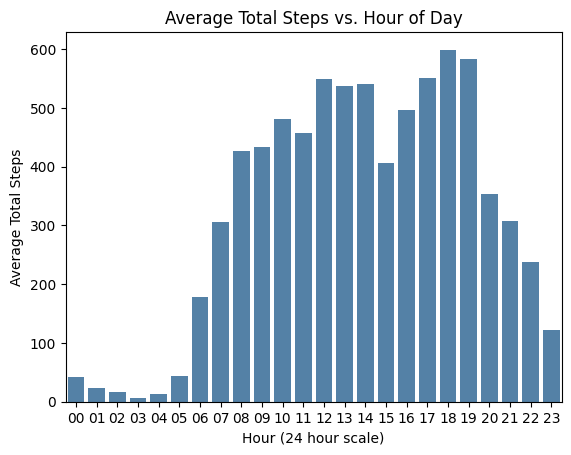

In [46]:
bar_plot = sns.barplot(x='Hour', y='step_mean', data=agg_hourly_df, color='steelblue')
bar_plot.set(xlabel='Hour (24 hour scale)', ylabel='Average Total Steps', title='Average Total Steps vs. Hour of Day')
plt.show()

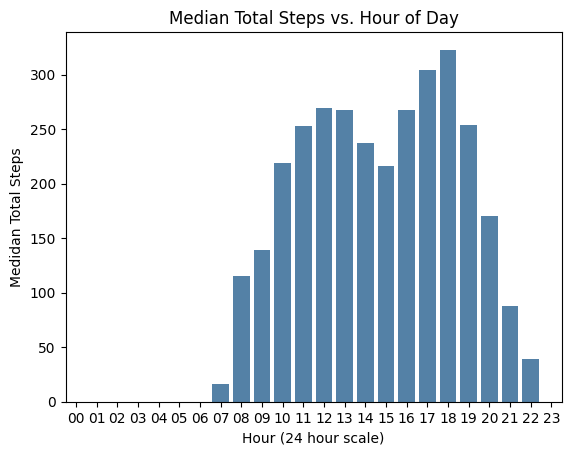

In [47]:
bar_plot = sns.barplot(x='Hour', y='step_median', data=agg_hourly_df, color='steelblue')
bar_plot.set(xlabel='Hour (24 hour scale)', ylabel='Medidan Total Steps', title='Median Total Steps vs. Hour of Day')
plt.show()

These data show that these participants had a lot of step activity from 12 to 2 PM and 5 to 7 PM, with a noticable dip at 3 PM. There is also an eventual tapering off in the later hours of the night (8 PM to 7 AM). This is farily consistent with what I expected, although I find it strange that there is a lot of step activity between 10 AM and 2 PM. This I did not expect, as I thought that those hours are typically work hours for the average person. My expectation is that there would be higher steps from 6 AM to 8 AM, then the step average would dip between 9 AM and 5 PM then pick back up again from 6 to 8 PM. This is because I expect the average person exercises before or after work, where the typical work hours are 9 AM to 5 PM. This is quite an interesting find. I decided to graph both mean and median of ```TotalSteps``` to show both central tendencies. However, since these data are heavily skewed, the median is a better representation of the average than the mean.

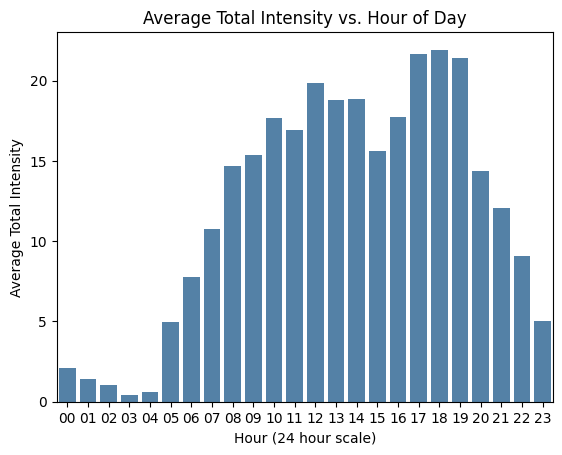

In [48]:
bar_plot = sns.barplot(x='Hour', y='intensity_mean', data=agg_hourly_df, color='steelblue')
bar_plot.set(xlabel='Hour (24 hour scale)', ylabel='Average Total Intensity', title='Average Total Intensity vs. Hour of Day')
plt.show()

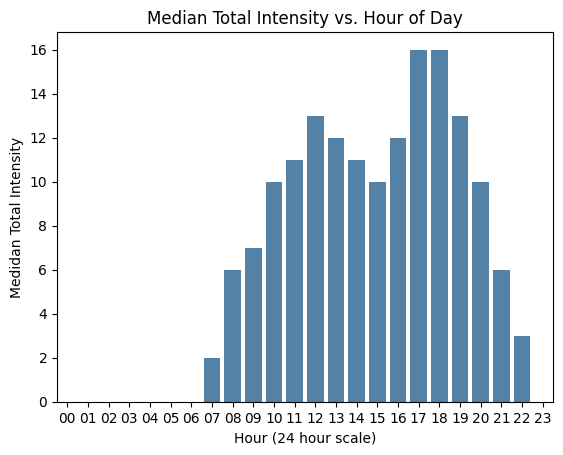

In [49]:
bar_plot = sns.barplot(x='Hour', y='intensity_median', data=agg_hourly_df, color='steelblue')
bar_plot.set(xlabel='Hour (24 hour scale)', ylabel='Medidan Total Intensity', title='Median Total Intensity vs. Hour of Day')
plt.show()

Intensity bar graphs look nearly identical to the total step bar graphs. This passes the sanity check.

### 5.5) Diving Deeper into User's Heart Rate Data

In [50]:
heartrate_df.groupby(['Hour']).count()

,Id,Date,Value
Hour,,,
00,67901,67901,67901
01,66444,66444,66444
02,63754,63754,63754
03,63922,63922,63922
04,62029,62029,62029
05,64497,64497,64497
06,78351,78351,78351
07,101073,101073,101073
08,116800,116800,116800


Interesting. There is a noticable change in number of logged events at 7 AM. This could be a result of users charging their tracking devices at night and putting it on in the morning.

In [51]:
heartrate_df = heartrate_df.drop(['Id', 'Date'], axis=1)
heartrate_df.head()

,Value,Hour
0,97,07
1,102,07
2,105,07
3,103,07
4,101,07


Let's now take a look at the type of distribution the heart rate data are in.

<Axes: xlabel='Value', ylabel='Count'>

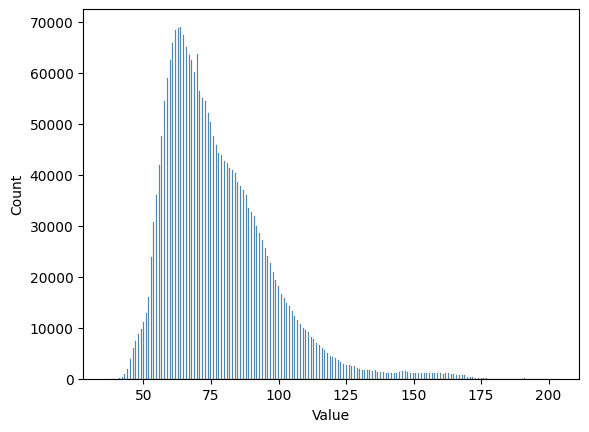

In [52]:
sns.histplot(data=heartrate_df, x='Value')

These data are shown to be heavily skewed to the right. This means that the median would represent the average value better than the mean.

In [53]:
agg_heartrate_df = heartrate_df.groupby(['Hour']).agg(median_hr = ('Value', 'median'))
agg_heartrate_df.reset_index(inplace=True)

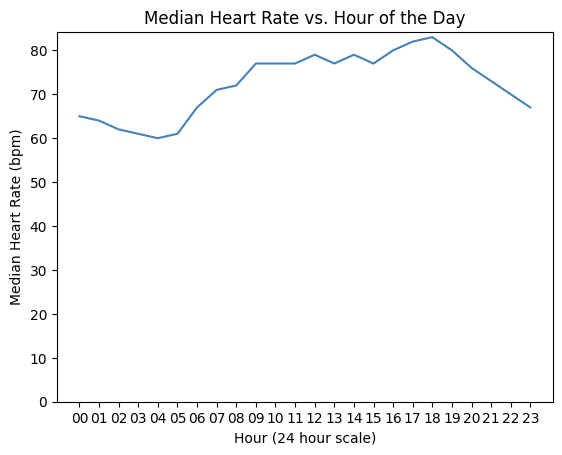

In [54]:
lineplot = sns.lineplot(x='Hour', y='median_hr', data=agg_heartrate_df, color='steelblue')
lineplot.set(xlabel='Hour (24 hour scale)', ylabel='Median Heart Rate (bpm)', title='Median Heart Rate vs. Hour of the Day')
plt.ylim(0)
plt.show()

Nice. This graph shows data similar to the bar plots in the previous sections comparing hour of day with average steps and average intensity. There is elevated heart rate between 5 PM and 7 PM. This is fairly consistent with the number of steps as well as intensity being higher in those hours as well. Similarly, during night time hours, heart rate is lower due to sleep.

### 5.6) Diving Deeper into User's Sleep Data

Let's see if there is a statistically significant difference in sleep time and time in bed across days of the week. We can do this with the null hypotheses:

$H_0$: There is no difference in sleep time across days of the week

$H_0:$ There is no difference in time in bed across days of the week

In [55]:
# Providing order to the days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
sleep_day_df['Day'] = sleep_day_df['Day'].astype(cat_type)

In [56]:
# Dropping Id and Date columns
sleep_day_df = sleep_day_df.drop(['Id', 'Date'], axis=1)
sleep_day_df.head()

,TotalMinutesAsleep,TotalTimeInBed,Day
0,327,346,Tuesday
1,384,407,Wednesday
2,412,442,Friday
3,340,367,Saturday
4,700,712,Sunday


<Axes: xlabel='TotalMinutesAsleep', ylabel='Count'>

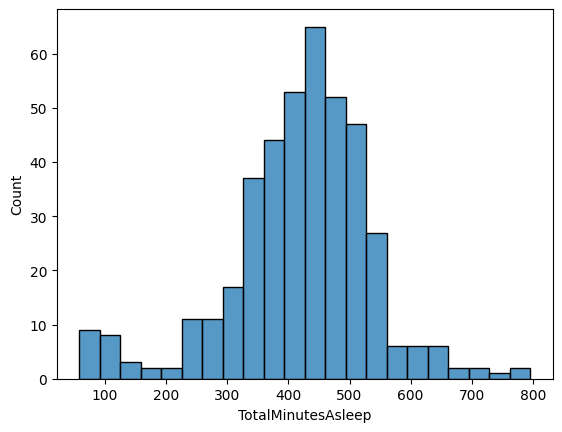

In [57]:
sns.histplot(data=sleep_day_df, x='TotalMinutesAsleep')

Oooh, this looks somewhat similar to a normal distribution. Let's check using the Shapiro-Wilk test.

In [58]:
# Shapiro-Wilk Test
stat_sleep, p_sleep = shapiro(sleep_day_df['TotalMinutesAsleep'])
stat_bed, p_bed = shapiro(sleep_day_df['TotalTimeInBed'])
print('Statistics (sleep)=%.3f, p (sleep)=%.3f' % (stat_sleep, p_sleep))
print('Statistics (bed)=%.3f, p (bed)=%.3f' % (stat_bed, p_bed))

alpha = 0.05
if p_sleep > alpha:
    print('Sleep sample looks Gaussian')
else:
    print('Sleep sample does not look Gaussian')

if p_bed > alpha:
    print('Bed sample looks Gaussian')
else:
    print('Bed sample does not look Gaussian')

Statistics (sleep)=0.951, p (sleep)=0.000
Statistics (bed)=0.914, p (bed)=0.000
Sleep sample does not look Gaussian
Bed sample does not look Gaussian


Looks like we need to use a non-parametric test. Let's see if these data have homogeneity of variance.

In [59]:
mon_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Monday']
tue_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Tuesday']
wed_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Wednesday']
thurs_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Thursday']
fri_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Friday']
sat_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Saturday']
sun_day = sleep_day_df.loc[sleep_day_df['Day'] == 'Sunday']

In [60]:
stat_sleep, p_sleep = fligner(mon_day['TotalMinutesAsleep'], tue_day['TotalMinutesAsleep'], wed_day['TotalMinutesAsleep'], 
                            thurs_day['TotalMinutesAsleep'], fri_day['TotalMinutesAsleep'], sat_day['TotalMinutesAsleep'],
                            sun_day['TotalMinutesAsleep'])
stat_bed, p_bed = fligner(mon_day['TotalTimeInBed'], tue_day['TotalTimeInBed'], wed_day['TotalTimeInBed'], 
                            thurs_day['TotalTimeInBed'], fri_day['TotalTimeInBed'], sat_day['TotalTimeInBed'],
                            sun_day['TotalTimeInBed'])

print('Statistics (sleep)=%.3f, p (sleep)=%.3f' % (stat_sleep, p_sleep))
print('Statistics (calories)=%.3f, p (bed)=%.3f' % (stat_bed, p_bed))

alpha = 0.05
if p_sleep > alpha:
    print('Sleep variance are homogeneous')
else:
    print('Sleep variance are not homogeneous')

if p_bed > alpha:
    print('Bed variance are homogeneous')
else:
    print('Bed variance are not homogeneous')

Statistics (sleep)=23.822, p (sleep)=0.001
Statistics (calories)=25.677, p (bed)=0.000
Sleep variance are not homogeneous
Bed variance are not homogeneous


Tough. There isn't really a statistical test that is non-parametric that also violates the assumption of homogeneity of variance across more than two groups. Let's just take a look at the central tendencies instead.

In [61]:
agg_sleep_day_df = sleep_day_df.groupby(['Day']).mean()
agg_sleep_day_df.reset_index(inplace=True)

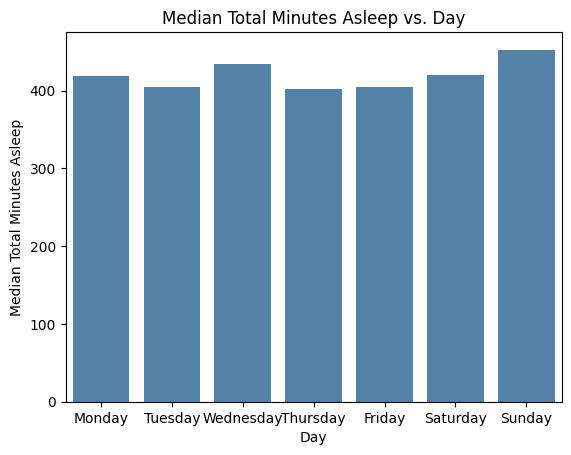

In [62]:
barplot = sns.barplot(data=agg_sleep_day_df, x='Day', y='TotalMinutesAsleep', color='steelblue')
barplot.set(ylabel='Median Total Minutes Asleep',title='Median Total Minutes Asleep vs. Day')
plt.show()

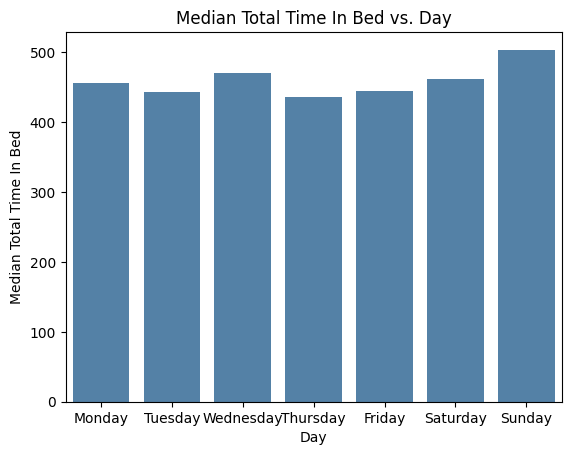

In [63]:
barplot = sns.barplot(data=agg_sleep_day_df, x='Day', y='TotalTimeInBed', color='steelblue')
barplot.set(ylabel='Median Total Time In Bed',title='Median Total Time In Bed vs. Day')
plt.show()

Both of these bar graphs show that the participants slept more on Sunday on average than any other day.

## **6) Act**

### 6.1) Limitations

There are quite a lot of limitations with this dataset. I personally do not believe that these data are generalizable to Bellabeat's target female audience. To begin, we do not know the sex of these participants in the Fitbit dataset. Since [Fitbit calculates calories burned](https://help.fitbit.com/articles/en_US/Help_article/1141.htm) by taking into account height, weight, and sex (along with other data), we need to know what the sex is of each participant in order to draw a somewhat reliable conclusion involving calories burned. Similarly, we need to know sex for distance travelled. Fitbit is also [incredibly unreliable](https://www.aber.ac.uk/en/news/archive/2019/01/title-220012-en.html) when reporting calories burned. This was shown in a study conducted by Aberystwyth University in the UK, where Fitbit over predicted burned calories by 53.5% at a walking pace of 4 km. We also do not know the age of participants, as age would contribute to average heart rate and many other measured variables. Another issue with these data is related to the Fitbit model where these data are collected. The dataset authors say that the Fitbit models can be different. Different Fitbit models can contribute to the variance of these data, rather than the high variability being random noise. All in all, since the number of participants was so small and there are so many variables that could be confounding, I believe that we cannot draw very many accurate conclusions from these data. I would request a different dataset, ideally one containing Bellabeat's own products.

### 6.2) Conclusions

While there are many limitations with this dataset, I belive that some conclusions can be drawn about Fitbit user behaviors. Firstly, it is rare that fitness tracker users log their activities. These data show that only 4% of the logged data have a recorded activity. Next, there is no statistically significant difference in number of steps or calories burned across days. This was shown through the Kruskal-Wallis H-test, where both null hypotheses were retained. We can also conclude that since 80% of all users utilized sleep tracking, the feature may be important for fitness tracker users. Lastly, we can determine that fitness tracker users show the highest activity around 6 PM, right after the typical work day ends.

### 6.3) Recommendations

I would personally recommend to the marketing team to try to target new consumers of any of the tracking products at around 5:30 PM, as the time gives enough leeway for people to settle down after work as well as it being prior to the time of peak activity (6 PM). This may entice potential consumers to purchase a tracking device. Another marketing recommendation is to existing users of the Bellabeat tracking app. One way to do this is through push notifications on mobile that flashes an advertisement for either new devices or different devices (if the consumer owns the Bellabeat Leaf, market the Bellabeat Spring or vice versa). A great time to advertise these products is also around 5:30 PM for the same reasons. This would also be a great time to advertise the Bellabeat membership as well.